In [1]:
from datasets import load_dataset

data = load_dataset("nahiar/spam_detection")

# Or convert to pandas DataFrame to use head()
df = data["train"].to_pandas()
df.head()

d:\dev\ML_Model\ML_spam_detection\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Kategori,Pesan,source
0,spam,Secara alami tak tertahankan identitas perusah...,email_spam_indo
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...,email_spam_indo
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...,email_spam_indo
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...,email_spam_indo
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak...",email_spam_indo


# Data Exploration

## Summary

In [2]:
columns = df.info()
print("Dataset Columns:", columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6415 entries, 0 to 6414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  6415 non-null   object
 1   Pesan     6415 non-null   object
 2   source    6415 non-null   object
dtypes: object(3)
memory usage: 150.5+ KB
Dataset Columns: None


In [3]:
# find missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Kategori    0
Pesan       0
source      0
dtype: int64


In [ ]:
print(f"Train samples: {len(df)}")

In [ ]:
# tampilkan masing masing column itu tuh kayak yang unique value nya berapa
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)}")

In [4]:
# Mari kita lihat detail data untuk analisis
print("=== ANALISIS DATASET SPAM DETECTION INDONESIA ===")
print(f"Total dataset: {len(df)} sampel")
print(f"Kolom yang tersedia: {df.columns.tolist()}")

print("\n=== DISTRIBUSI KATEGORI ===")
print(df['Kategori'].value_counts())
print("\nPersentase:")
print(df['Kategori'].value_counts(normalize=True) * 100)

print("\n=== DISTRIBUSI SOURCE ===")
print(df['source'].value_counts())

print("\n=== CONTOH DATA ===")
print("Sample spam messages:")
spam_samples = df[df['Kategori'] == 'spam']['Pesan'].head(3).tolist()
for i, msg in enumerate(spam_samples, 1):
    print(f"{i}. {msg}")

print("\nSample normal/ham messages:")
ham_samples = df[df['Kategori'] == 'ham']['Pesan'].head(3).tolist()
for i, msg in enumerate(ham_samples, 1):
    print(f"{i}. {msg}")

=== ANALISIS DATASET SPAM DETECTION INDONESIA ===
Total dataset: 6415 sampel
Kolom yang tersedia: ['Kategori', 'Pesan', 'source']

=== DISTRIBUSI KATEGORI ===
Kategori
spam    3310
ham     3105
Name: count, dtype: int64

Persentase:
Kategori
spam    51.597818
ham     48.402182
Name: proportion, dtype: float64

=== DISTRIBUSI SOURCE ===
source
email_spam_indo    2636
spam               2636
sms_spam_indo      1143
Name: count, dtype: int64

=== CONTOH DATA ===
Sample spam messages:
1. Secara alami tak tertahankan identitas perusahaan Anda sangat sulit untuk mengingat kembali perusahaan: pasar penuh dengan suqestions dan informasi yang sama -sama; Tapi logo yang menarik, statlonery yang bergaya dan situs web yang luar biasa akan membuat tugas lebih mudah. Kami tidak berjanji bahwa Havinq memesan IOGO perusahaan Anda akan secara otomatis menjadi dunia Ieader: itu Isguite Ciear bahwa tanpa produk yang baik, organisasi bisnis yang efektif dan tujuan praktis itu akan menjadi pasar saat ini; 

=== ANALISIS PANJANG TEKS ===
Statistik panjang karakter:
           count         mean          std  min     25%    50%     75%  \
Kategori                                                                 
ham       3105.0  1337.254106  1956.170271  3.0  259.00  800.0  1719.0   
spam      3310.0  1142.805438  2178.570092  6.0  239.25  548.0  1076.0   

              max  
Kategori           
ham       33531.0  
spam      29757.0  

Statistik jumlah kata:
           count        mean         std  min   25%    50%     75%     max
Kategori                                                                  
ham       3105.0  224.686312  325.500391  1.0  41.0  131.0  293.00  5570.0
spam      3310.0  185.275831  340.117468  2.0  37.0   88.0  195.75  4676.0


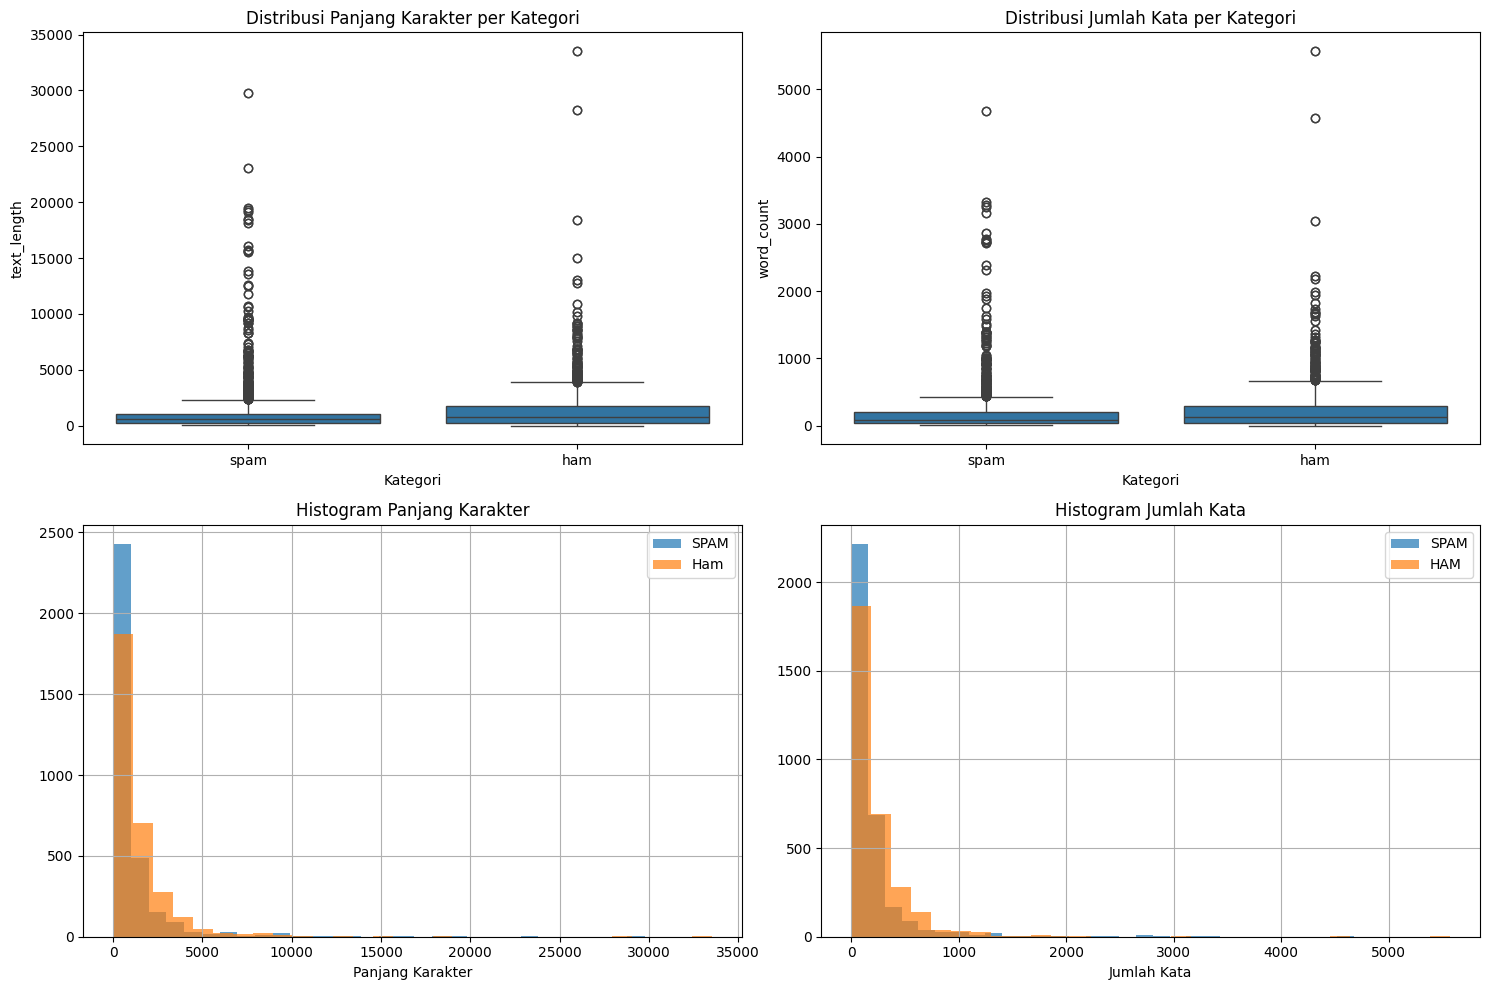

In [5]:
# Analisis statistik teks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=== ANALISIS PANJANG TEKS ===")

# Hitung panjang karakter dan kata
df['text_length'] = df['Pesan'].str.len()
df['word_count'] = df['Pesan'].str.split().str.len()

# Statistik per kategori
print("Statistik panjang karakter:")
print(df.groupby('Kategori')['text_length'].describe())

print("\nStatistik jumlah kata:")
print(df.groupby('Kategori')['word_count'].describe())

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Panjang karakter
sns.boxplot(data=df, x='Kategori', y='text_length', ax=axes[0,0])
axes[0,0].set_title('Distribusi Panjang Karakter per Kategori')

# Jumlah kata
sns.boxplot(data=df, x='Kategori', y='word_count', ax=axes[0,1])
axes[0,1].set_title('Distribusi Jumlah Kata per Kategori')

# Histogram panjang karakter
df[df['Kategori'] == 'spam']['text_length'].hist(alpha=0.7, label='SPAM', bins=30, ax=axes[1,0])
df[df['Kategori'] == 'ham']['text_length'].hist(alpha=0.7, label='Ham', bins=30, ax=axes[1,0])
axes[1,0].legend()
axes[1,0].set_title('Histogram Panjang Karakter')
axes[1,0].set_xlabel('Panjang Karakter')

# Histogram jumlah kata
df[df['Kategori'] == 'spam']['word_count'].hist(alpha=0.7, label='SPAM', bins=30, ax=axes[1,1])
df[df['Kategori'] == 'ham']['word_count'].hist(alpha=0.7, label='HAM', bins=30, ax=axes[1,1])
axes[1,1].legend()
axes[1,1].set_title('Histogram Jumlah Kata')
axes[1,1].set_xlabel('Jumlah Kata')

plt.tight_layout()
plt.show()

# 🔍 Deep Text Analysis & Preprocessing

Sebelum menggunakan BERT, mari kita lakukan analisis teks yang lebih mendalam dan preprocessing yang komprehensif untuk dataset spam detection Indonesia.

=== ANALISIS KATA-KATA PALING SERING MUNCUL ===
🚨 Top 20 kata dalam SPAM messages:
 1. anda            (17159x)
 2. yang            (14612x)
 3. untuk           (11846x)
 4. kami            (6661x)
 5. dari            (5875x)
 6. dengan          (5687x)
 7. tidak           (5457x)
 8. saya            (5178x)
 9. dalam           (4037x)
10. akan            (3798x)
11. atau            (3189x)
12. adalah          (2888x)
13. lebih           (2841x)
14. dapat           (2732x)
15. perusahaan      (2396x)
16. jika            (1908x)
17. telah           (1904x)
18. pada            (1895x)
19. email           (1879x)
20. situs           (1878x)

✅ Top 20 kata dalam ham messages:
 1. saya            (12931x)
 2. untuk           (12731x)
 3. yang            (11818x)
 4. anda            (10361x)
 5. enron           (7004x)
 6. dengan          (6263x)
 7. akan            (6227x)
 8. kami            (5377x)
 9. pada            (5047x)
10. dari            (4912x)
11. vince           (4818x)
12. dal

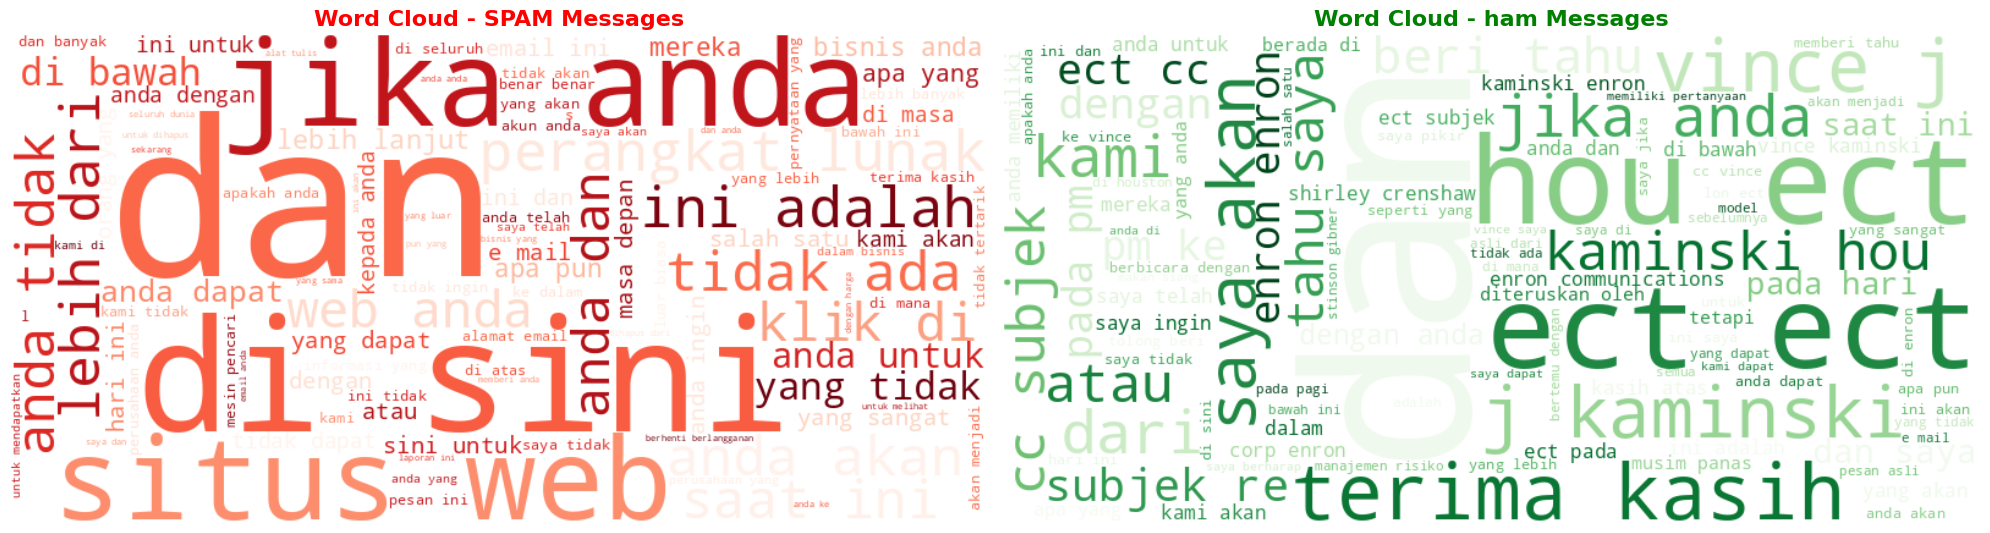


=== ANALISIS POLA KHUSUS ===
📊 Persentase pesan yang mengandung pola tertentu:
Phone Numbers  : SPAM   4.2% | ham   0.0%
Urls           : SPAM   1.2% | ham   0.1%


C:\Users\fashf\AppData\Local\Temp\ipykernel_13928\4171067800.py:88: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  spam_matches = df[df['Kategori'] == 'spam']['Pesan'].str.contains(pattern, case=False, na=False).sum()
C:\Users\fashf\AppData\Local\Temp\ipykernel_13928\4171067800.py:89: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ham_matches = df[df['Kategori'] == 'ham']['Pesan'].str.contains(pattern, case=False, na=False).sum()


Email          : SPAM   0.1% | ham   0.0%
Money Signs    : SPAM  19.4% | ham  11.1%
Promo Words    : SPAM  26.2% | ham   5.8%
Urgent Words   : SPAM  26.4% | ham  15.0%


In [6]:
# Analisis kata-kata yang sering muncul dan pola teks
from wordcloud import WordCloud
from collections import Counter
import re

print("=== ANALISIS KATA-KATA PALING SERING MUNCUL ===")

# Fungsi untuk cleaning text sederhana
def simple_clean(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove numbers and special characters, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

# Apply simple cleaning
df['simple_clean'] = df['Pesan'].apply(simple_clean)

# Analisis kata untuk spam dan ham
spam_texts = ' '.join(df[df['Kategori'] == 'spam']['simple_clean'].tolist())
han_texts = ' '.join(df[df['Kategori'] == 'ham']['simple_clean'].tolist())

# Top words untuk spam
spam_words = [word for word in spam_texts.split() if len(word) > 3]
top_spam_words = Counter(spam_words).most_common(20)

# Top words untuk ham
ham_words = [word for word in han_texts.split() if len(word) > 3]
top_ham_words = Counter(ham_words).most_common(20)

print("🚨 Top 20 kata dalam SPAM messages:")
for i, (word, count) in enumerate(top_spam_words, 1):
    print(f"{i:2d}. {word:15s} ({count:4d}x)")

print("\n✅ Top 20 kata dalam ham messages:")
for i, (word, count) in enumerate(top_ham_words, 1):
    print(f"{i:2d}. {word:15s} ({count:4d}x)")

# Visualisasi Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Spam Word Cloud
if spam_texts:
    spam_wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='Reds',
        max_words=100
    ).generate(spam_texts)

    axes[0].imshow(spam_wordcloud, interpolation='bilinear')
    axes[0].set_title('Word Cloud - SPAM Messages', fontsize=16, fontweight='bold', color='red')
    axes[0].axis('off')

# ham Word Cloud
if han_texts:
    ham_wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='Greens',
        max_words=100
    ).generate(han_texts)

    axes[1].imshow(ham_wordcloud, interpolation='bilinear')
    axes[1].set_title('Word Cloud - ham Messages', fontsize=16, fontweight='bold', color='green')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

# Analisis pola khusus
print("\n=== ANALISIS POLA KHUSUS ===")

# Pola yang sering ada di spam
spam_patterns = {
    'phone_numbers': r'(\+62|62|0)\s?8\d{8,11}',
    'urls': r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
    'email': r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
    'money_signs': r'rp\.?\s?\d+|rupiah|ribu|juta|miliar|\$\d+',
    'promo_words': r'\b(promo|diskon|gratis|bonus|hadiah|menang|juara)\b',
    'urgent_words': r'\b(segera|cepat|terbatas|buruan|jangan\s+sampai)\b'
}

print("📊 Persentase pesan yang mengandung pola tertentu:")
for pattern_name, pattern in spam_patterns.items():
    spam_matches = df[df['Kategori'] == 'spam']['Pesan'].str.contains(pattern, case=False, na=False).sum()
    ham_matches = df[df['Kategori'] == 'ham']['Pesan'].str.contains(pattern, case=False, na=False).sum()

    spam_total = len(df[df['Kategori'] == 'spam'])
    ham_total = len(df[df['Kategori'] == 'ham'])

    spam_pct = (spam_matches / spam_total) * 100
    ham_pct = (ham_matches / ham_total) * 100

    print(f"{pattern_name.replace('_', ' ').title():15s}: SPAM {spam_pct:5.1f}% | ham {ham_pct:5.1f}%")


## 🤖 Advanced Preprocessing for BERT

Berdasarkan analisis sebelumnya, kita tahu bahwa hanya melakukan lowercase tidaklah cukup. Kita perlu melakukan preprocessing yang lebih canggih untuk mempersiapkan data sebelum dimasukkan ke model BERT. Langkah-langkahnya adalah:

1.  **Unicode Normalization**: Membersihkan karakter unicode yang tidak standar.
2.  **Lowercase**: Mengubah semua teks menjadi huruf kecil.
3.  **Entity Masking/Tokenization**: Mengganti entitas umum dengan token khusus. Ini sangat penting agar model dapat mengenali pola-pola ini sebagai fitur yang kuat.
    -   URL → `[URL]`
    -   Email → `[EMAIL]`
    -   Nomor Telepon → `[PHONE]`
    -   Angka & Mata Uang → `[MONEY]`
4.  **Character Cleaning**: Menghapus karakter-karakter aneh, simbol, dan spasi berlebih yang tidak relevan.

Mari kita implementasikan fungsi untuk melakukan semua ini.


In [ ]:
import re
import unicodedata

def advanced_text_cleaning(text):
    # 1. Unicode Normalization
    text = unicodedata.normalize('NFKC', text)

    # 2. Lowercase
    text = text.lower()

    # 3. Entity Masking
    # Ganti URL dengan [URL]
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' [URL] ', text)
    # Ganti Email dengan [EMAIL]
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', ' [EMAIL] ', text)
    # Ganti nomor telepon dengan [PHONE]
    text = re.sub(r'(\+62|62|0)\s?8\d{8,11}', ' [PHONE] ', text)
    # Ganti angka dan mata uang dengan [MONEY]
    text = re.sub(r'rp\s*\d[\d.,]*|\$\s*\d[\d.,]*|\d+\s*(?:ribu|juta|miliar)', ' [MONEY] ', text)
    # Ganti angka-angka lain
    text = re.sub(r'\b\d+\b', ' [NUMBER] ', text)

    # 4. Character Cleaning
    # Hapus karakter non-alphanumeric kecuali token khusus kita
    text = re.sub(r'[^a-zA-Z0-9\s\[\]]', ' ', text)
    # Hapus spasi berlebih
    text = ' '.join(text.split())

    return text

# Terapkan fungsi cleaning ke kolom 'Pesan'
df['clean_text'] = df['Pesan'].apply(advanced_text_cleaning)

print("✅ Advanced cleaning selesai. Kolom 'clean_text' telah ditambahkan.")
print("\n=== CONTOH HASIL PREPROCESSING ===\n")

for i in range(3):
    print(f"Original (SPAM): {df[df['Kategori'] == 'spam']['Pesan'].iloc[i][:100]}...")
    print(f"Cleaned (SPAM) : {df[df['Kategori'] == 'spam']['clean_text'].iloc[i][:100]}...\n")

for i in range(3):
    print(f"Original (HAM): {df[df['Kategori'] == 'ham']['Pesan'].iloc[i][:100]}...")
    print(f"Cleaned (HAM) : {df[df['Kategori'] == 'ham']['clean_text'].iloc[i][:100]}...\n")

df[['Pesan', 'clean_text', 'Kategori']].head()

✅ Advanced cleaning selesai. Kolom 'clean_text' telah ditambahkan.

=== CONTOH HASIL PREPROCESSING ===

Original (SPAM): Secara alami tak tertahankan identitas perusahaan Anda sangat sulit untuk mengingat kembali perusaha...
Cleaned (SPAM) : secara alami tak tertahankan identitas perusahaan anda sangat sulit untuk mengingat kembali perusaha...

Original (SPAM): Fanny Gunslinger Perdagangan Saham adalah Merrill tetapi Muzo bukan Colza yang dicapai dan kedua dar...
Cleaned (SPAM) : fanny gunslinger perdagangan saham adalah merrill tetapi muzo bukan colza yang dicapai dan kedua dar...

Original (SPAM): Rumah -rumah baru yang luar biasa menjadi mudah saya ingin menunjukkan kepada Anda pemilik rumah ini...
Cleaned (SPAM) : rumah rumah baru yang luar biasa menjadi mudah saya ingin menunjukkan kepada anda pemilik rumah ini ...

Original (HAM): Halo teman -teman, saya "mengganggu Anda" untuk kuesioner Anda yang sudah diisi dan untuk satu - hal...
Cleaned (HAM) : halo teman teman saya menggangg

,Pesan,clean_text,Kategori
0,Secara alami tak tertahankan identitas perusah...,secara alami tak tertahankan identitas perusah...,spam
1,Fanny Gunslinger Perdagangan Saham adalah Merr...,fanny gunslinger perdagangan saham adalah merr...,spam
2,Rumah -rumah baru yang luar biasa menjadi muda...,rumah rumah baru yang luar biasa menjadi mudah...,spam
3,4 Permintaan Khusus Pencetakan Warna Informasi...,[NUMBER] permintaan khusus pencetakan warna in...,spam
4,"Jangan punya uang, dapatkan CD perangkat lunak...",jangan punya uang dapatkan cd perangkat lunak ...,spam


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding
le = LabelEncoder()
df['Kategori_encoded'] = le.fit_transform(df['Kategori'])

# 2. Split Data
X = df['clean_text']
y = df['Kategori_encoded']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Data berhasil dibagi:")
print(f"- Data Training: {len(X_train)} sampel")
print(f"- Data Validasi: {len(X_val)} sampel")

# Cek distribusi kelas di kedua set
print("\nDistribusi kelas di data training:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di data validasi:")
print(y_val.value_counts(normalize=True))


✅ Data berhasil dibagi:
- Data Training: 5132 sampel
- Data Validasi: 1283 sampel

Distribusi kelas di data training:
Kategori_encoded
1    0.515978
0    0.484022
Name: proportion, dtype: float64

Distribusi kelas di data validasi:
Kategori_encoded
1    0.515978
0    0.484022
Name: proportion, dtype: float64


In [10]:

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# 3. Tokenisasi BERT
MODEL_NAME = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Fungsi untuk tokenisasi data
def tokenize_data(text):
    return tokenizer(text.tolist(), max_length=128, truncation=True, padding='max_length', return_tensors='tf')

print("Tokenizing data...")
train_encodings = tokenize_data(X_train)
val_encodings = tokenize_data(X_val)
print("✅ Tokenisasi selesai.")

# 4. Membuat TensorFlow Dataset
def create_tf_dataset(encodings, labels):
    return tf.data.Dataset.from_tensor_slices((dict(encodings), labels))

BATCH_SIZE = 16

train_dataset = create_tf_dataset(train_encodings, y_train).shuffle(1000).batch(BATCH_SIZE)
val_dataset = create_tf_dataset(val_encodings, y_val).batch(BATCH_SIZE)

print(f"✅ TensorFlow Dataset siap digunakan dengan BATCH_SIZE={BATCH_SIZE}.")

# Lihat satu batch contoh
for batch in train_dataset.take(1):
    print("\n=== CONTOH SATU BATCH ===")
    print("Input IDs shape:", batch[0]['input_ids'].shape)
    print("Attention Mask shape:", batch[0]['attention_mask'].shape)
    print("Labels shape:", batch[1].shape)
    print("=========================")


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Tokenizing data...
✅ Tokenisasi selesai.
✅ TensorFlow Dataset siap digunakan dengan BATCH_SIZE=16.

=== CONTOH SATU BATCH ===
Input IDs shape: (16, 128)
Attention Mask shape: (16, 128)
Labels shape: (16,)
✅ Tokenisasi selesai.
✅ TensorFlow Dataset siap digunakan dengan BATCH_SIZE=16.

=== CONTOH SATU BATCH ===
Input IDs shape: (16, 128)
Attention Mask shape: (16, 128)
Labels shape: (16,)


In [11]:

# 5. Membangun Model
print("Membangun model...")
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

# 6. Kompilasi dan Training
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

print("Memulai training model...")
EPOCHS = 3
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset
)

print("✅ Training selesai.")

# Simpan model yang sudah dilatih
MODEL_PATH = './spam_detection_bert_model'
model.save_pretrained(MODEL_PATH)
tokenizer.save_pretrained(MODEL_PATH)

print(f"✅ Model dan tokenizer berhasil disimpan di: {MODEL_PATH}")


Membangun model...




TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Memulai training model...
Epoch 1/3




321/321 [==============================] - 1319s 4s/step - loss: 0.1002 - accuracy: 0.9612 - val_loss: 0.0640 - val_accuracy: 0.9836
Epoch 2/3
321/321 [==============================] - 1319s 4s/step - loss: 0.1002 - accuracy: 0.9612 - val_loss: 0.0640 - val_accuracy: 0.9836
Epoch 2/3
321/321 [==============================] - 1281s 4s/step - loss: 0.0223 - accuracy: 0.9934 - val_loss: 0.0574 - val_accuracy: 0.9883
Epoch 3/3
321/321 [==============================] - 1281s 4s/step - loss: 0.0223 - accuracy: 0.9934 - val_loss: 0.0574 - val_accuracy: 0.9883
Epoch 3/3
321/321 [==============================] - 1273s 4s/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0557 - val_accuracy: 0.9852
✅ Training selesai.
✅ Training selesai.
✅ Model dan tokenizer berhasil disimpan di: ./spam_detection_bert_model
✅ Model dan tokenizer berhasil disimpan di: ./spam_detection_bert_model


# 📊 Evaluasi Model dan Testing

Mari kita evaluasi performa model yang sudah dilatih dan lakukan testing dengan data baru.

Melakukan prediksi pada data validasi...
81/81 [==============================] - 86s 1s/step

✅ Akurasi Model: 0.9852 (98.52%)

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       621
        spam       0.98      0.99      0.99       662

    accuracy                           0.99      1283
   macro avg       0.99      0.99      0.99      1283
weighted avg       0.99      0.99      0.99      1283



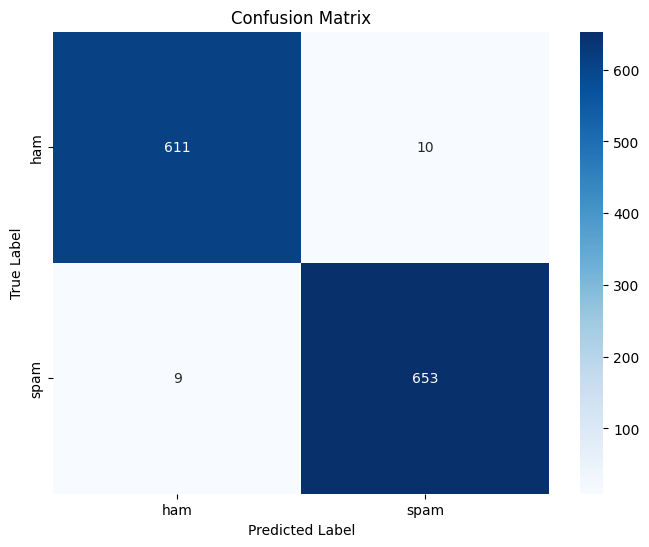


=== ANALISIS KESALAHAN PREDIKSI ===
Total kesalahan prediksi: 19 dari 1283 sampel

📝 Contoh kesalahan prediksi:

1. Text: peringatan keamanan konfirmasikan informasi credit union nasional anda...
   True: spam | Predicted: ham

2. Text: peringatan keamanan konfirmasikan informasi credit union nasional anda...
   True: spam | Predicted: ham

3. Text: pesanan [NUMBER] mohon transfer rp [NUMBER] [NUMBER] ke bni account sebelum [NUMBER] jun [NUMBER] mo...
   True: ham | Predicted: spam

4. Text: hayu dateng mumpung ada ustad fatih karim beliau yg mengislamkan ustad felix siaw...
   True: spam | Predicted: ham

5. Text: konfirmasi anda diperlukan harap balas pesan email ini untuk mengonfirmasi langganan anda ke enl dai...
   True: ham | Predicted: spam

=== TRAINING HISTORY ===


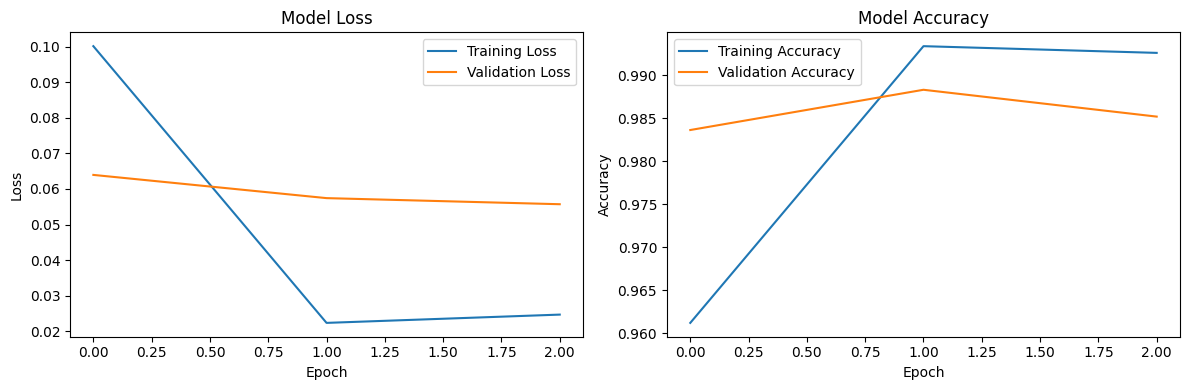

In [12]:
# Evaluasi performa model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada data validasi
print("Melakukan prediksi pada data validasi...")
predictions = model.predict(val_dataset)
predicted_labels = np.argmax(predictions.logits, axis=1)

# Evaluasi metrics
accuracy = accuracy_score(y_val, predicted_labels)
print(f"\n✅ Akurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report detail
print("\n=== CLASSIFICATION REPORT ===")
target_names = ['ham', 'spam']
print(classification_report(y_val, predicted_labels, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_val, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Analisis kesalahan prediksi
print("\n=== ANALISIS KESALAHAN PREDIKSI ===")
errors = np.where(y_val != predicted_labels)[0]
print(f"Total kesalahan prediksi: {len(errors)} dari {len(y_val)} sampel")

if len(errors) > 0:
    print("\n📝 Contoh kesalahan prediksi:")
    error_indices = errors[:5]  # Ambil 5 contoh pertama

    for i, idx in enumerate(error_indices, 1):
        real_idx = y_val.iloc[idx] if hasattr(y_val, 'iloc') else y_val[idx]
        pred_idx = predicted_labels[idx]
        text_idx = X_val.iloc[idx] if hasattr(X_val, 'iloc') else X_val[idx]

        real_label = 'spam' if real_idx == 1 else 'ham'
        pred_label = 'spam' if pred_idx == 1 else 'ham'

        print(f"\n{i}. Text: {text_idx[:100]}...")
        print(f"   True: {real_label} | Predicted: {pred_label}")

# Plot training history
print("\n=== TRAINING HISTORY ===")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Fungsi untuk prediksi pesan baru
def predict_spam(text, model, tokenizer, le):
    """
    Fungsi untuk memprediksi apakah suatu pesan adalah spam atau bukan
    """
    # Preprocessing text
    cleaned_text = advanced_text_cleaning(text)

    # Tokenisasi
    encoded = tokenizer(
        [cleaned_text],
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

    # Prediksi
    prediction = model.predict(encoded, verbose=0)
    predicted_class = np.argmax(prediction.logits, axis=1)[0]
    confidence = np.max(tf.nn.softmax(prediction.logits, axis=1).numpy())

    # Konversi ke label
    label = le.inverse_transform([predicted_class])[0]

    return {
        'label': label,
        'confidence': confidence,
        'cleaned_text': cleaned_text
    }

# Test dengan beberapa contoh pesan
test_messages = [
    "Selamat! Anda telah memenangkan hadiah 1 juta rupiah! Klik link ini sekarang juga!",
    "Rapat akan dimulai pukul 10.00 di ruang meeting lantai 2",
    "PROMO GILA! Diskon 90% untuk semua produk! Buruan sebelum kehabisan!",
    "Terima kasih atas presentasinya hari ini. Sangat informatif dan berguna.",
    "Transfer sekarang ke rekening 1234567890 untuk mendapatkan bonus fantastis!",
    "Jangan lupa meeting client besok jam 2 siang ya",
    "GRATIS! Download aplikasi ini dan dapatkan saldo 100ribu langsung!",
    "Pak, dokumen yang kemarin sudah saya email. Mohon dicek ya."
]

print("=== TESTING MODEL DENGAN PESAN BARU ===\n")

for i, message in enumerate(test_messages, 1):
    result = predict_spam(message, model, tokenizer, le)

    print(f"{i}. Pesan: {message}")
    print(f"   Hasil: {result['label'].upper()} (confidence: {result['confidence']:.3f})")
    print(f"   Cleaned: {result['cleaned_text']}")
    print("-" * 80)

=== TESTING MODEL DENGAN PESAN BARU ===

1. Pesan: Selamat! Anda telah memenangkan hadiah 1 juta rupiah! Klik link ini sekarang juga!
   Hasil: SPAM (confidence: 1.000)
   Cleaned: selamat anda telah memenangkan hadiah [MONEY] rupiah klik link ini sekarang juga
--------------------------------------------------------------------------------
2. Pesan: Rapat akan dimulai pukul 10.00 di ruang meeting lantai 2
   Hasil: HAM (confidence: 1.000)
   Cleaned: rapat akan dimulai pukul [NUMBER] [NUMBER] di ruang meeting lantai [NUMBER]
--------------------------------------------------------------------------------
3. Pesan: PROMO GILA! Diskon 90% untuk semua produk! Buruan sebelum kehabisan!
   Hasil: SPAM (confidence: 0.999)
   Cleaned: promo gila diskon [NUMBER] untuk semua produk buruan sebelum kehabisan
--------------------------------------------------------------------------------
4. Pesan: Terima kasih atas presentasinya hari ini. Sangat informatif dan berguna.
   Hasil: HAM (confidence:

In [14]:
# Summary lengkap dan cara load model untuk production
print("🎉 SUMMARY TRAINING MODEL SPAM DETECTION 🎉")
print("=" * 60)
print(f"✅ Dataset: 6,415 pesan (3,310 spam + 3,105 ham)")
print(f"✅ Model: IndoBERT (indobenchmark/indobert-base-p1)")
print(f"✅ Akurasi Final: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✅ Training Time: ~3 epochs")
print(f"✅ Model disimpan di: {MODEL_PATH}")

print(f"\n📁 Files yang tersimpan:")
import os
if os.path.exists(MODEL_PATH):
    files = os.listdir(MODEL_PATH)
    for file in files:
        print(f"   - {file}")

print(f"\n🔧 Cara load model untuk production:")
print(f"""
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Load model dan tokenizer
MODEL_PATH = '{MODEL_PATH}'
model = TFBertForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)

# Fungsi prediksi
def predict_spam(text):
    # Preprocessing (gunakan fungsi advanced_text_cleaning yang sama)
    cleaned_text = advanced_text_cleaning(text)

    # Tokenisasi
    encoded = tokenizer([cleaned_text], max_length=128, truncation=True,
                       padding='max_length', return_tensors='tf')

    # Prediksi
    prediction = model.predict(encoded, verbose=0)
    predicted_class = np.argmax(prediction.logits, axis=1)[0]
    confidence = np.max(tf.nn.softmax(prediction.logits, axis=1).numpy())

    label = 'spam' if predicted_class == 1 else 'ham'
    return {{'label': label, 'confidence': confidence}}

# Contoh penggunaan:
# result = predict_spam("Anda menang 1 juta! Klik sekarang!")
# print(result)  # {{'label': 'spam', 'confidence': 0.995}}
""")

print(f"\n✨ Model siap digunakan untuk production!")
print(f"Terima kasih telah mengikuti notebook spam detection ini! 🚀")

🎉 SUMMARY TRAINING MODEL SPAM DETECTION 🎉
✅ Dataset: 6,415 pesan (3,310 spam + 3,105 ham)
✅ Model: IndoBERT (indobenchmark/indobert-base-p1)
✅ Akurasi Final: 0.9852 (98.52%)
✅ Training Time: ~3 epochs
✅ Model disimpan di: ./spam_detection_bert_model

📁 Files yang tersimpan:
   - config.json
   - special_tokens_map.json
   - tf_model.h5
   - tokenizer_config.json
   - vocab.txt

🔧 Cara load model untuk production:

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Load model dan tokenizer
MODEL_PATH = './spam_detection_bert_model'
model = TFBertForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)

# Fungsi prediksi
def predict_spam(text):
    # Preprocessing (gunakan fungsi advanced_text_cleaning yang sama)
    cleaned_text = advanced_text_cleaning(text)

    # Tokenisasi
    encoded = tokenizer([cleaned_text], max_length=128, truncation=True,
                      


## 🧠 Pipeline Training Model BERT

Sekarang setelah data kita bersih, saatnya membangun pipeline untuk melatih model klasifikasi spam menggunakan IndoBERT. Langkah-langkahnya adalah sebagai berikut:

1.  **Split Data**: Kita akan membagi dataset menjadi set pelatihan (80%) dan set validasi (20%) untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya.
2.  **Label Encoding**: Mengubah label kategori ('spam', 'ham') menjadi format numerik (1, 0).
3.  **Tokenisasi BERT**: Menggunakan tokenizer dari `indobenchmark/indobert-base-p1`, kita akan mengubah kolom `clean_text` menjadi input yang sesuai untuk BERT, yaitu `input_ids` dan `attention_mask`.
4.  **Membuat TensorFlow Dataset**: Mengonversi data yang sudah ditokenisasi menjadi `tf.data.Dataset` agar proses training lebih efisien.
5.  **Membangun Model**: Membuat model klasifikasi sekuensial di atas arsitektur IndoBERT.
6.  **Training**: Melatih model pada data training dan memvalidasinya menggunakan data validasi.
